In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

## KMeans from scratch

In [13]:
class KMeans_scratch():
    def __init__(self, num_clusters=5, max_iter=100, plot_progress=False, plot_per_iter = 10):
        self.num_clusters = num_clusters
        self.max_iter = max_iter
        self.plot_progress = plot_progress
        self.clusters = [[] for _ in range(self.num_clusters)]
        self.centroids = []
        self.plot_per_iter = plot_per_iter
        self.__sse_iter = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_centroid_idxs = np.random.choice(self.n_samples, self.num_clusters, replace=False)
        self.centroids = [self.X[idx] for idx in random_centroid_idxs]

        sse = []
        for index in range(self.max_iter):
            self.clusters = self.__create_clusters(self.centroids)
            if self.plot_progress and index % self.plot_per_iter == 0:
                self.plot_clusters()

            centroids_old = self.centroids
            self.centroids = self.__get_centroids(self.clusters)
            sse.append(self.count_sse())
            if self.__clusters_not_changed(centroids_old, self.centroids):
                if self.plot_progress:
                    self.plot_clusters()
                self.__sse_iter = sse
                break            
        return self.__get_cluster_labels(self.clusters)

    def get_sse_value(self):
        return self.__sse_iter[-1]
    
    def plot_clusters(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            ax.scatter(*self.X[index].T)
        for point in self.centroids:
            ax.scatter(*point, marker="X", color='black', linewidth=10, cmap = plt.cm.spring)
        plt.show()
    
    def count_sse(self):
        SSE = 0
        for ind in range(len(self.clusters)):
            cluster_indxs = self.clusters[ind]
            SSE_cluster = np.sum((self.X[cluster_indxs] - self.centroids[ind])**2)
            SSE += SSE_cluster
        return SSE
    
    def plot_sse(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.__sse_iter)
        plt.title(f'SSE. cluster = {self.num_clusters}')
        plt.xlabel('Number of iterations')
        plt.ylabel('SSE value')
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def __get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def __create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.num_clusters)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.__closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def __closest_centroid(self, sample, centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def __get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.num_clusters, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def __clusters_not_changed(self, old_centroids, new_centroids):
        distances = [self.euclidean_distance(old_centroids[i], 
                                             new_centroids[i]) for i in range(self.num_clusters)]
        return sum(distances) == 0

901
450
124


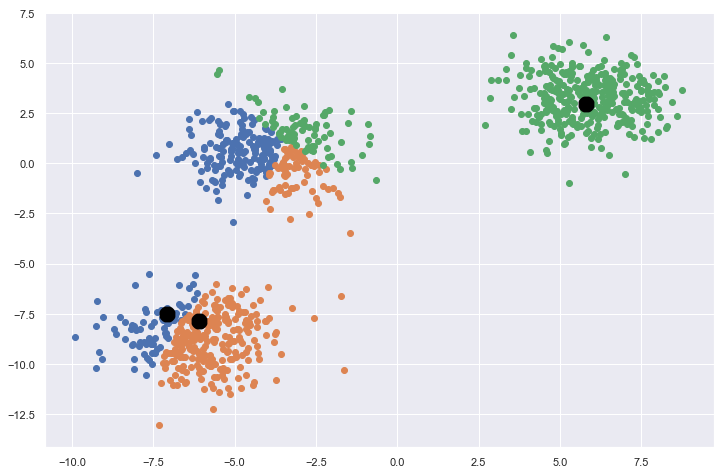

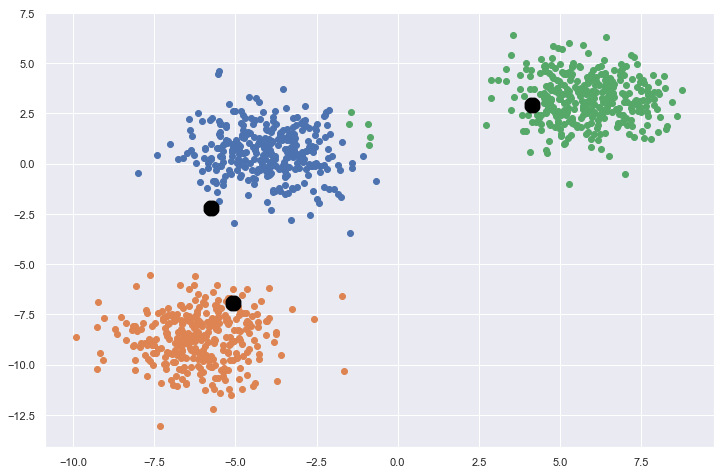

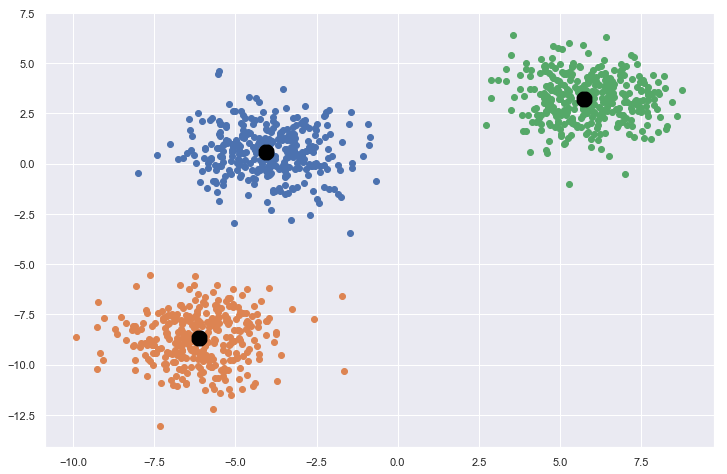

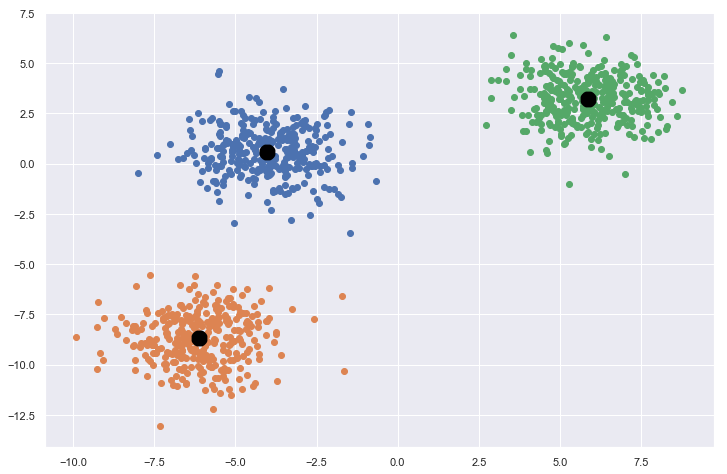

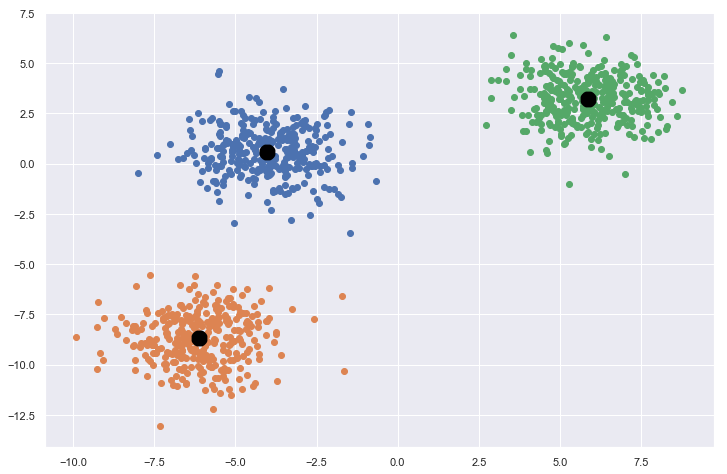

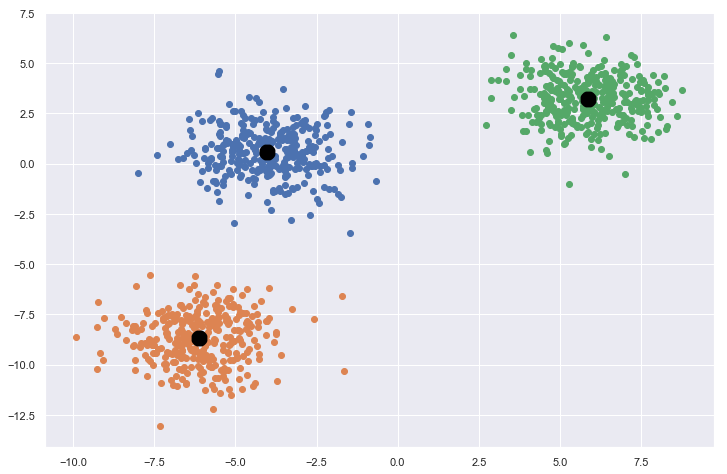

In [14]:
X, y = make_blobs(n_samples = 1000, n_features=2, centers=3, cluster_std = 1.2, random_state=17)
    
kmeans = KMeans_scratch(num_clusters=3, max_iter=150, plot_progress=True, plot_per_iter=1)
y_pred = kmeans.predict(X)
kmeans.plot_clusters()

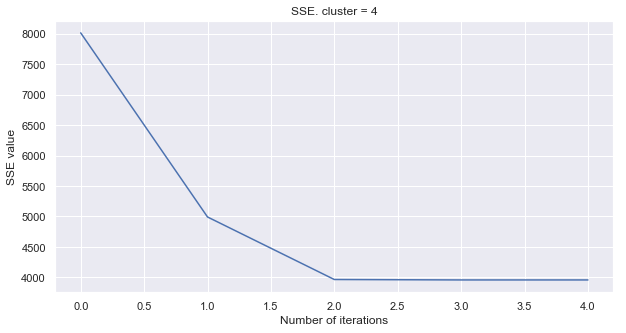

In [99]:
kmeans.plot_sse()

In [100]:
sse_for_clust = []
for clust in range(2, 10):
    kmeans = KMeans_scratch(num_clusters=clust, max_iter=100, plot_progress=False)
    kmeans.predict(X)
    sse_for_clust.append((clust, kmeans.get_sse_value()))

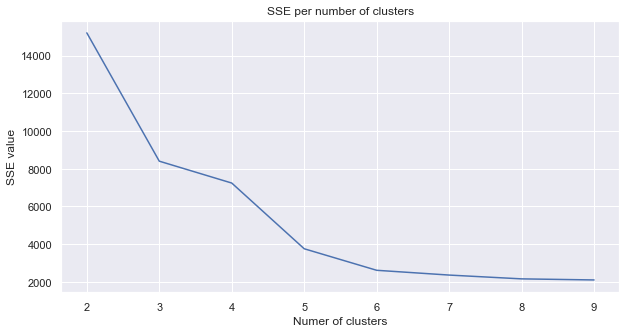

In [101]:
indexes = [ind[0] for ind in sse_for_clust]
values = [ind[1] for ind in sse_for_clust]

plt.figure(figsize=(10,5))
plt.plot(indexes, values)
plt.title('SSE per number of clusters')
plt.xlabel('Numer of clusters')
plt.ylabel('SSE value');

## Sklearn methods

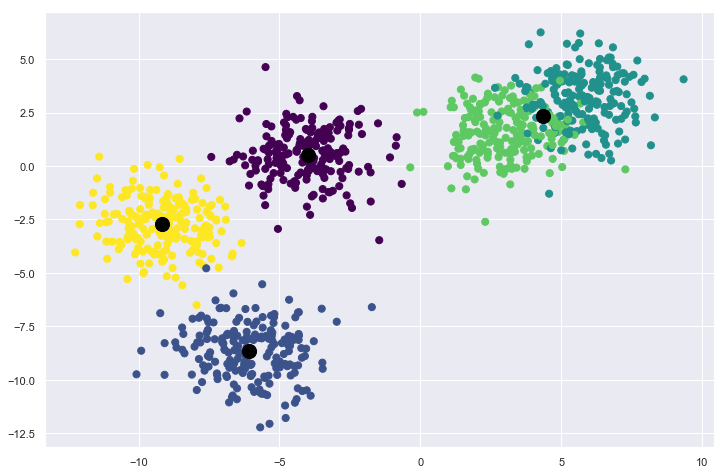

In [102]:
kmeans_sklearn = KMeans(n_clusters=4, max_iter = 350)
kmeans_sklearn.fit(X)
pred_sklearn = kmeans_sklearn.predict(X)

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
centers = kmeans_sklearn.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1.0);

## KMeans on data.csv

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [16]:
data_df = pd.read_csv('data.csv', encoding='cp1251').drop(columns=['Модель', 'Цвет'])
data_df_dum = pd.get_dummies(data_df)

st_scal = StandardScaler()
data_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = st_scal.fit_transform(data_df[['Год', 
                                                    'Пробег', 'Объем', 'Мощность', 'Цена']])
data_df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,1.055883,БУ,-1.129295,-1.096928,бензин,-0.458895,хэтчбек,передний,автомат,левый,1 владелец,0.420103
1,Skoda,0.868335,БУ,-0.842782,-0.125615,бензин,0.440164,кроссовер,полный,механика,левый,1 владелец,0.315187
2,Renault,1.430978,БУ,-1.663641,-0.449386,бензин,-0.439766,хэтчбек,передний,механика,левый,1 владелец,0.294203
3,Nissan,0.868335,БУ,-0.728177,-0.449386,бензин,-0.363250,хэтчбек,передний,автомат,левый,1 владелец,-0.020546
4,УАЗ,1.243431,БУ,-1.014690,1.331355,бензин,-0.018930,внедорожник,полный,механика,левый,1 владелец,0.231254


In [217]:
for col in data_df.columns:
    if col.find('КПП') != -1:
        print(col)

КПП_автомат
КПП_вариатор
КПП_механика
КПП_роботизированная


In [192]:
kmeans_cars = KMeans_scratch(num_clusters=10, max_iter=300, plot_progress=False)
labels_cars = kmeans_cars.predict(np.array(data_df))

In [233]:
for n_clust in range(10):
    clust_df = data_df_dum.iloc[kmeans_cars.clusters[n_clust]]
    print('\n\n------ Кластер ', n_clust, ' -------\n')
    print(f'Cluster shape = {clust_df.shape}')
    print(f'Средний год выпуска = {clust_df.Год.mean()}')
    print(f'Средний пробег = {clust_df.Пробег.mean()}')
    print(f'Средний объем двигателя = {clust_df.Объем.mean()}')
    print(f'Средняя мощность = {clust_df.Мощность.mean()}')
    print(f'Средняя цена = {clust_df.Цена.mean()}')
    print(clust_df['Привод_полный'].value_counts().head(1))
    print(clust_df['Марка_Subaru'].value_counts().head(2))
    print(clust_df['Кузов_внедорожник'].value_counts().head(2))
    print(clust_df['КПП_автомат'].value_counts().head(2))
    print('---------------------------')



------ Кластер  0  -------

Cluster shape = (5376, 126)
Средний год выпуска = 2004.865513392857
Средний пробег = 169790.39174107142
Средний объем двигателя = 1552.6785714285713
Средняя мощность = 95.29650297619048
Средняя цена = 185882.3943452381
0    5277
Name: Привод_полный, dtype: int64
0    5365
1      11
Name: Марка_Subaru, dtype: int64
0    5305
1      71
Name: Кузов_внедорожник, dtype: int64
0    5018
1     358
Name: КПП_автомат, dtype: int64
---------------------------


------ Кластер  1  -------

Cluster shape = (2064, 126)
Средний год выпуска = 1999.2412790697674
Средний пробег = 80415.15310077519
Средний объем двигателя = 1698.062015503876
Средняя мощность = 84.34883720930233
Средняя цена = 100162.85755813954
0    1458
Name: Привод_полный, dtype: int64
0    2053
1      11
Name: Марка_Subaru, dtype: int64
0    1524
1     540
Name: Кузов_внедорожник, dtype: int64
0    1926
1     138
Name: КПП_автомат, dtype: int64
---------------------------


------ Кластер  2  -------

Cl